# Experiments one of malware detection for CTU-50

In [20]:
%load_ext autoreload
%autoreload 2

#import tensorflow
import pandas as pd
#from zat import zeek_log_reader
import pprint
#from zat.log_to_dataframe import LogToDataFrame
from matplotlib import pyplot as plt
import sklearn


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
# Load data
df_1_1 = pd.read_csv('ctu-50-features/Client1/Day1/comb_features.csv')

In [44]:
print(f'Amount of features: {len(df_1_1.columns)}')
print(f'Amount of rows: {len(df_1_1)}')

Amount of features: 49
Amount of rows: 345


In [34]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)         # initiate notebook for offline plot
import plotly

import plotly.graph_objects as go
import chart_studio.plotly as py
#fig = px.density_heatmap(df, x="day", y="cert_ratio")
#fig.show()
#table = ff.create_table(df)
#py.iplot(table, filename='jupyter-table1')

#data = [go.Bar(x=df.num_flows, y=df.avg_dur)]
#py.iplot(data, filename='jupyter-basic_bar')

trace0 = go.Histogram(
   x = df_1_1.std_dev_dur
)

data = [trace0]
plotly.offline.iplot({ "data": data,"layout": go.Layout(title="Num flows/Avg Dur")})



TypeError: '<' not supported between instances of 'Version' and 'Version'

In [9]:
import plotly.express as px 
df_int = df_1_1.select_dtypes(include=['int64'])
fig = px.histogram(df_int, x='num_flows', y=df_int.columns)
fig.show()

In [13]:
sub_df = df_1_1[['num_flows', 
             'avg_dur', 
             'std_dev_dur',
             'percent_stdev_dur',
             'total_size_of_flows_orig', 
             'total_size_of_flows_resp', 
             'ratio_of_sizes',
             'percent_of_established_states',
             'inbound_pckts',
             'outbound_pckts',
             'periodicity_avg',
             'periodicity_stdev',
             'ssl_ratio',
             'average_public_key',
             'tls_version_ratio',
             'avg_cert_length',
             'is_valid_certificate_during_capture',
             'amount_diff_certificates',
             'num_domains_in_cert',
             'cert_ratio',
             'num_certificate_path',
             'x509_ssl_ratio',
             'SNI_ssl_ratio',
             'self_signed_ratio',
             'is_SNIs_in_SNA_dns', 
             'SNI_equal_DstIP',
             'is_CNs_in_SNA_dns', 
             'ratio_of_differ_SNI_in_ssl_log',
             'ratio_of_differ_subject_in_ssl_log',
             'ratio_of_differ_issuer_in_ssl_log', 
             'ratio_of_differ_subject_in_cert',
             'ratio_of_differ_issuer_in_cert', 
             'ratio_of_differ_sandns_in_cert',
             'ratio_of_same_subjects', 
             'ratio_of_same_issuer',
             'ratio_is_same_CN_and_SNI', 
             'avg_certificate_exponent',
             'is_SNI_in_top_level_domain', 
             'ratio_certificate_path_error',
             'ratio_missing_cert_in_cert_path', 
             'label', 
             'detailedlabel',
             'id.orig_h', 
             'id.resp_h', 
             'id.resp_p', 
             'proto', 
             'day', 
             'hour'
             ]]

sub_df

,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,...,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour
0,1,1.135424,0.000000,0.000000,1596,4039,2.530702,1.0,16,14,...,-1,-1,Benign,Microsoft,147.32.81.x0,40.74.108.123,443,tcp,0,21
1,4,92.400486,22.285054,0.500000,5268,12396,2.353075,1.0,75,84,...,-1,-1,Benign,Microsoft,147.32.81.x0,20.54.24.231,443,tcp,0,22
2,2,0.834819,0.000782,0.000000,4565,9722,2.129682,1.0,22,36,...,-1,-1,Benign,Microsoft,147.32.81.x0,20.189.173.15,443,tcp,0,22
3,2,0.841672,0.009870,0.000000,5771,5269,0.913013,1.0,16,24,...,-1,-1,Benign,Microsoft,147.32.81.x0,20.189.173.9,443,tcp,0,22
4,3,102.445934,16.365461,0.666667,3942,9296,2.358194,1.0,46,68,...,-1,-1,Benign,Microsoft,147.32.81.x0,20.54.24.246,443,tcp,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2,122.762723,1.091410,0.500000,2442,13990,5.728911,1.0,46,44,...,-1,-1,Benign,Microsoft,147.32.81.x0,13.107.5.88,443,tcp,0,21
341,1,900.284013,0.000000,0.000000,47905,5774,0.120530,1.0,85,98,...,-1,-1,Benign,Dropbox,147.32.81.x0,162.125.19.130,443,tcp,0,21
342,1,0.655577,0.000000,0.000000,2312,4861,2.102509,1.0,14,18,...,-1,-1,Benign,Microsoft,147.32.81.x0,52.168.112.66,443,tcp,0,21
343,2,0.486422,0.004881,0.000000,5770,9722,1.684922,1.0,22,32,...,-1,-1,Benign,Microsoft,147.32.81.x0,20.42.65.84,443,tcp,0,21


In [19]:
import seaborn as sns
sns.pairplot(sub_df)

In [11]:
# Delete the correlated features
# Get correlated matrix
cor_matrix = df_1_1.corr().abs()
# Get the upper triangle of the matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
# Find columns to drop if they have more than .95 correlation
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
# drop
df_client1_nocorr = df_1_1.drop(df_1_1[to_drop], axis=1)

/tmp/ipykernel_1589728/3910169409.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: xlabel='detailedlabel', ylabel='Count'>

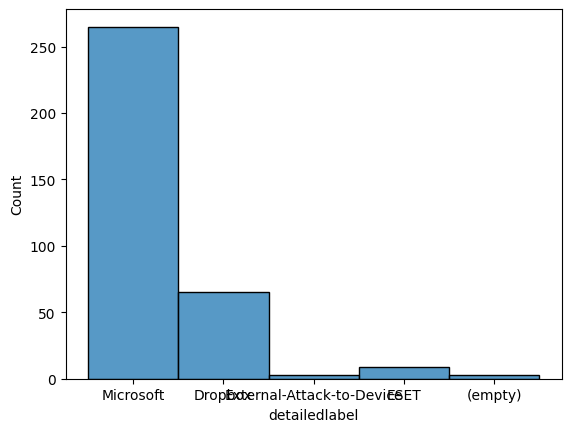

In [20]:

sns.histplot(df_1_1.detailedlabel)

In [ ]:
import plotly.express as px

fig = px.histogram(df_1_1, x="total_size_of_flows_orig")
fig.show()

In [21]:
# load all data
# Load data
df_1_1 = pd.read_csv('ctu-50-features/Client1/Day1/comb_features.csv')
df_1_2 = pd.read_csv('ctu-50-features/Client1/Day2/comb_features.csv')
df_1_3 = pd.read_csv('ctu-50-features/Client1/Day3/comb_features.csv')
df_1_4 = pd.read_csv('ctu-50-features/Client1/Day4/comb_features.csv')
df_1_5 = pd.read_csv('ctu-50-features/Client1/Day5/comb_features.csv')

df_2_1 = pd.read_csv('ctu-50-features/Client2/Day1/comb_features.csv')
df_2_2 = pd.read_csv('ctu-50-features/Client2/Day2/comb_features.csv')
df_2_3 = pd.read_csv('ctu-50-features/Client2/Day3/comb_features.csv')
df_2_4 = pd.read_csv('ctu-50-features/Client2/Day4/comb_features.csv')
df_2_5 = pd.read_csv('ctu-50-features/Client2/Day5/comb_features.csv')

df_3_1 = pd.read_csv('ctu-50-features/Client3/Day1/comb_features.csv')
df_3_2 = pd.read_csv('ctu-50-features/Client3/Day2/comb_features.csv')
df_3_3 = pd.read_csv('ctu-50-features/Client3/Day3/comb_features.csv')
df_3_4 = pd.read_csv('ctu-50-features/Client3/Day4/comb_features.csv')
df_3_5 = pd.read_csv('ctu-50-features/Client3/Day5/comb_features.csv')

df_4_1 = pd.read_csv('ctu-50-features/Client4/Day1/comb_features.csv')
df_4_2 = pd.read_csv('ctu-50-features/Client4/Day2/comb_features.csv')
df_4_3 = pd.read_csv('ctu-50-features/Client4/Day3/comb_features.csv')
df_4_4 = pd.read_csv('ctu-50-features/Client4/Day4/comb_features.csv')
df_4_5 = pd.read_csv('ctu-50-features/Client4/Day5/comb_features.csv')

df_5_1 = pd.read_csv('ctu-50-features/Client5/Day1/comb_features.csv')
df_5_2 = pd.read_csv('ctu-50-features/Client5/Day2/comb_features.csv')
df_5_3 = pd.read_csv('ctu-50-features/Client5/Day3/comb_features.csv')
df_5_4 = pd.read_csv('ctu-50-features/Client5/Day4/comb_features.csv')
df_5_5 = pd.read_csv('ctu-50-features/Client5/Day5/comb_features.csv')

df_6_1 = pd.read_csv('ctu-50-features/Client6/Day1/comb_features.csv')
df_6_2 = pd.read_csv('ctu-50-features/Client6/Day2/comb_features.csv')
df_6_3 = pd.read_csv('ctu-50-features/Client6/Day3/comb_features.csv')
df_6_4 = pd.read_csv('ctu-50-features/Client6/Day4/comb_features.csv')
df_6_5 = pd.read_csv('ctu-50-features/Client6/Day5/comb_features.csv')

df_7_1 = pd.read_csv('ctu-50-features/Client7/Day1/comb_features.csv')
df_7_2 = pd.read_csv('ctu-50-features/Client7/Day2/comb_features.csv')
df_7_3 = pd.read_csv('ctu-50-features/Client7/Day3/comb_features.csv')
df_7_4 = pd.read_csv('ctu-50-features/Client7/Day4/comb_features.csv')
df_7_5 = pd.read_csv('ctu-50-features/Client7/Day5/comb_features.csv')

df_8_1 = pd.read_csv('ctu-50-features/Client8/Day1/comb_features.csv')
df_8_2 = pd.read_csv('ctu-50-features/Client8/Day2/comb_features.csv')
df_8_3 = pd.read_csv('ctu-50-features/Client8/Day3/comb_features.csv')
df_8_4 = pd.read_csv('ctu-50-features/Client8/Day4/comb_features.csv')
df_8_5 = pd.read_csv('ctu-50-features/Client8/Day5/comb_features.csv')

df_9_1 = pd.read_csv('ctu-50-features/Client9/Day1/comb_features.csv')
df_9_2 = pd.read_csv('ctu-50-features/Client9/Day2/comb_features.csv')
df_9_3 = pd.read_csv('ctu-50-features/Client9/Day3/comb_features.csv')
df_9_4 = pd.read_csv('ctu-50-features/Client9/Day4/comb_features.csv')
df_9_5 = pd.read_csv('ctu-50-features/Client9/Day5/comb_features.csv')

df_10_1 = pd.read_csv('ctu-50-features/Client10/Day1/comb_features.csv')
df_10_2 = pd.read_csv('ctu-50-features/Client10/Day2/comb_features.csv')
df_10_3 = pd.read_csv('ctu-50-features/Client10/Day3/comb_features.csv')
df_10_4 = pd.read_csv('ctu-50-features/Client10/Day4/comb_features.csv')
df_10_5 = pd.read_csv('ctu-50-features/Client10/Day5/comb_features.csv')

df_m1_1 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-219-2/Day1/comb_features.csv')

df_m2_1 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-230-1/Day1/comb_features.csv')

df_m3_1 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-246-1/Day1/comb_features.csv')
df_m3_2 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-246-1/Day2/comb_features.csv')
df_m3_3 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-246-1/Day3/comb_features.csv')
df_m3_4 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-246-1/Day4/comb_features.csv')
df_m3_5 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-246-1/Day5/comb_features.csv')

df_m4_1 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-327-2/Day1/comb_features.csv')
df_m4_2 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-327-2/Day2/comb_features.csv')
df_m4_3 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-327-2/Day3/comb_features.csv')
df_m4_4 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-327-2/Day4/comb_features.csv')
df_m4_5 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-327-2/Day5/comb_features.csv')

df_m5_1 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-346-1/Day1/comb_features.csv')
df_m5_2 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-346-1/Day2/comb_features.csv')
df_m5_3 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-346-1/Day3/comb_features.csv')
df_m5_4 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-346-1/Day4/comb_features.csv')
df_m5_5 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-346-1/Day5/comb_features.csv')

df_m6_1 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-67-1/Day1/comb_features.csv')
df_m6_2 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-67-1/Day2/comb_features.csv')
df_m6_3 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-67-1/Day3/comb_features.csv')
df_m6_4 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-67-1/Day4/comb_features.csv')
df_m6_5 = pd.read_csv('ctu-50-features/Malware/CTU-Malware-Capture-Botnet-67-1/Day5/comb_features.csv')



In [22]:
# Get all the benign together 
df_1 = pd.concat([df_1_1, df_1_2, df_1_3, df_1_4, df_1_5])
df_1.reset_index(inplace=True)
df_2 = pd.concat([df_2_1, df_2_2, df_2_3, df_2_4, df_2_5])
df_2.reset_index(inplace=True)
df_3 = pd.concat([df_3_1, df_3_2, df_3_3, df_3_4, df_3_5])
df_3.reset_index(inplace=True)
df_4 = pd.concat([df_4_1, df_4_2, df_4_3, df_4_4, df_4_5])
df_4.reset_index(inplace=True)
df_5 = pd.concat([df_5_1, df_5_2, df_5_3, df_5_4, df_5_5])
df_5.reset_index(inplace=True)
df_6 = pd.concat([df_6_1, df_6_2, df_6_3, df_6_4, df_6_5])
df_6.reset_index(inplace=True)
df_7 = pd.concat([df_7_1, df_7_2, df_7_3, df_7_4, df_7_5])
df_7.reset_index(inplace=True)
df_8 = pd.concat([df_8_1, df_8_2, df_8_3, df_8_4, df_8_5])
df_8.reset_index(inplace=True)
df_9 = pd.concat([df_9_1, df_9_2, df_9_3, df_9_4, df_9_5])
df_9.reset_index(inplace=True)
df_10 = pd.concat([df_10_1, df_10_2, df_10_3, df_10_4, df_10_5])
df_10.reset_index(inplace=True)

# Get the malware together
df_m1 = pd.concat([df_m1_1])
df_m1.reset_index(inplace=True)
df_m2 = pd.concat([df_m2_1])
df_m2.reset_index(inplace=True)
df_m3 = pd.concat([df_m3_1, df_m3_2, df_m3_3, df_m3_4, df_m3_4])
df_m3.reset_index(inplace=True)
df_m4 = pd.concat([df_m4_1, df_m4_2, df_m4_3, df_m4_4, df_m4_4])
df_m4.reset_index(inplace=True)
df_m5 = pd.concat([df_m5_1, df_m5_2, df_m5_3, df_m5_4, df_m5_4])
df_m5.reset_index(inplace=True)
df_m6 = pd.concat([df_m6_1, df_m6_2, df_m6_3, df_m6_4, df_m6_4])
df_m6.reset_index(inplace=True)


In [74]:
# show display better
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
#pd.reset_option('display.max_columns')
#pd.reset_option('display.precision')

In [75]:
df_1.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour
count,1849.00,1849.00,1.85e+03,1.85e+03,1849.00,1849.00,1.85e+03,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.0,1849.0,1849.00,1.85e+03,1849.00,1.85e+03,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1.85e+03,1849.0,1849.0,1849,1849,1849,1849,1849.00,1849,1849.0,1849.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,8,169,NaN,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,Microsoft,147.32.81.x0,20.54.24.246,NaN,tcp,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1818,1425,1840,107,NaN,1840,NaN,NaN
mean,184.98,1.93,1.23e+02,7.58e+00,0.12,14323.93,1.08e+04,2.26,0.95,41.36,51.80,67.41,15.25,0.23,109.69,0.32,75.26,-0.79,-0.79,0.21,-0.56,-0.65,1.15,0.16,1.0,0.0,-0.59,-1.62e-03,-0.58,7.61e-03,0.08,0.08,-0.79,-0.79,-0.79,-0.76,-0.76,-0.78,2090.44,5.77e-03,-1.0,-1.0,NaN,NaN,NaN,NaN,457.53,NaN,0.0,11.39
std,107.79,1.30,2.67e+02,2.82e+01,0.21,32830.28,1.05e+05,4.85,0.17,54.03,62.43,243.56,88.48,0.53,365.28,0.43,148.76,0.41,0.41,0.41,0.88,0.69,0.32,0.33,0.0,0.0,0.80,4.03e-02,0.81,8.21e-02,0.23,0.23,0.41,0.41,0.41,0.48,0.48,0.44,11521.93,7.04e-02,0.0,0.0,NaN,NaN,NaN,NaN,262.01,NaN,0.0,7.18
min,0.00,1.00,3.00e-06,0.00e+00,0.00,195.00,0.00e+00,0.00,0.00,0.00,2.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,-1.00e+00,-1.00,0.00e+00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,0.00
25%,92.00,1.00,5.06e-01,0.00e+00,0.00,2311.00,4.48e+03,1.15,1.00,14.00,18.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00e+00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,5.00
50%,184.00,2.00,8.73e-01,6.34e-04,0.00,3216.00,6.20e+03,2.10,1.00,22.00,28.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00e+00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,11.00
75%,277.00,2.00,9.35e+01,1.11e-01,0.25,6086.00,9.72e+03,2.36,1.00,44.00,56.00,-1.00,-1.00,0.00,-1.00,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00e+00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,18.00


In [76]:
df_2.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour
count,3143.00,3143.00,3.14e+03,3143.00,3143.00,3.14e+03,3.14e+03,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.0,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.0,3143.0,3143.00,3.14e+03,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.00,3143.0,3143.0,3143,3143,3143,3143,3143.00,3143,3143.0,3143.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,9,1204,NaN,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,(empty),147.32.83.x8,34.225.190.52,NaN,tcp,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3126,2640,3133,37,NaN,3127,NaN,NaN
mean,338.47,4.16,2.59e+02,52.05,0.14,7.43e+04,7.41e+05,26.16,0.92,584.02,443.64,117.63,38.84,0.36,91.1,0.61,20.99,-0.94,-0.94,0.06,-0.70,-0.92,1.05,0.04,1.0,0.0,-0.90,-9.55e-04,-0.88,0.06,0.01,0.01,-0.94,-0.94,-0.94,-0.93,-0.93,-0.93,2751.49,0.02,-1.0,-1.0,NaN,NaN,NaN,NaN,488.10,NaN,0.0,10.95
std,221.06,21.83,1.12e+03,260.79,0.20,1.42e+06,1.61e+07,193.45,0.20,14389.71,8753.60,346.04,129.14,0.75,422.3,0.44,89.45,0.30,0.23,0.24,2.03,0.34,0.26,0.18,0.0,0.0,0.43,3.09e-02,0.47,0.21,0.09,0.09,0.24,0.23,0.24,0.30,0.30,0.29,13122.00,0.11,0.0,0.0,NaN,NaN,NaN,NaN,769.36,NaN,0.0,3.07
min,0.00,1.00,2.00e-06,0.00,0.00,7.20e+01,0.00e+00,0.00,0.00,0.00,2.00,-1.00,-1.00,0.00,-1.0,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,-1.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,2.00
25%,157.00,1.00,1.28e+01,0.00,0.00,1.88e+03,6.21e+03,1.16,1.00,24.00,26.00,-1.00,-1.00,0.00,-1.0,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,9.00
50%,314.00,2.00,6.03e+01,0.02,0.00,4.47e+03,1.07e+04,2.48,1.00,45.00,46.00,-1.00,-1.00,0.00,-1.0,0.88,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,12.00
75%,486.50,3.00,2.07e+02,15.81,0.29,1.37e+04,3.49e+04,5.24,1.00,125.00,117.50,8.14,0.00,0.50,-1.0,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,14.00


In [77]:
df_3.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour
count,2119.00,2119.00,2119.00,2119.00,2119.00,2.12e+03,2.12e+03,2119.00,2119.00,2.12e+03,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.0,2.12e+03,2119.00,2.12e+03,2119.00,2119.00,2.12e+03,2.12e+03,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.00,2119.0,2119.0,2119,2119,2119,2119,2119.00,2119,2119.0,2119.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,7,793,NaN,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,(empty),147.32.83.x15,65.9.94.12,NaN,tcp,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2102,2037,2112,37,NaN,2108,NaN,NaN
mean,232.52,5.01,319.28,60.52,0.14,2.54e+05,2.04e+06,58.35,0.92,2.55e+03,757.16,113.70,30.62,0.41,86.39,0.70,17.42,-0.95,-0.95,0.05,-0.56,-0.94,1.04,0.04,1.0,3.30e-03,-0.93,-9.44e-04,-0.91,0.04,4.92e-03,3.98e-03,-0.95,-0.95,-0.96,-0.94,-0.94,-0.94,2751.66,0.02,-1.0,-1.0,NaN,NaN,NaN,NaN,489.10,NaN,0.0,11.18
std,154.77,27.94,1332.58,355.63,0.20,1.02e+07,8.00e+07,1528.58,0.21,1.05e+05,21474.91,348.91,113.99,0.91,411.24,0.42,83.18,0.21,0.21,0.21,4.39,0.28,0.27,0.18,0.0,5.31e-02,0.36,3.07e-02,0.41,0.18,6.72e-02,5.98e-02,0.21,0.21,0.20,0.27,0.27,0.27,13149.45,0.12,0.0,0.0,NaN,NaN,NaN,NaN,591.98,NaN,0.0,2.95
min,0.00,1.00,-1.00,-1.00,-1.00,0.00e+00,0.00e+00,-1.00,0.00,0.00e+00,1.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.00e+00,-1.00,-1.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,5.00
25%,105.50,1.00,31.59,0.00,0.00,1.77e+03,6.14e+03,1.19,1.00,2.80e+01,34.00,-1.00,-1.00,0.00,-1.00,0.40,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.00e+00,-1.00,0.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,9.00
50%,211.00,2.00,99.60,0.01,0.00,3.80e+03,1.04e+04,2.57,1.00,5.30e+01,61.00,-1.00,-1.00,0.00,-1.00,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.00e+00,-1.00,0.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,11.00
75%,337.00,3.00,262.92,22.38,0.29,1.15e+04,3.25e+04,5.55,1.00,1.40e+02,161.00,8.38,0.00,0.50,-1.00,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.00e+00,-1.00,0.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,13.00


In [78]:
df_4.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour
count,1670.00,1670.00,1.67e+03,1670.00,1670.00,1.67e+03,1.67e+03,1670.00,1670.00,1670.00,1670.00,1.67e+03,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.0,1670.0,1670.00,1.67e+03,1670.00,1670.00,1.67e+03,1.67e+03,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.00,1670.0,1670.0,1670,1670,1670,1670,1670.00,1670,1670.0,1670.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,9,594,NaN,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,(empty),147.32.83.x23,1.1.1.2,NaN,tcp,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1595,1450,1662,50,NaN,1658,NaN,NaN
mean,173.28,2.95,4.16e+02,71.41,0.14,3.24e+04,4.43e+05,53.79,0.94,398.82,434.59,1.05e+02,25.75,0.32,25.23,0.62,4.80,-0.98,-0.98,0.02,-0.90,-0.97,1.02,0.01,1.0,0.0,-0.97,-5.99e-04,-0.96,0.03,1.88e-03,1.88e-03,-0.98,-0.98,-0.98,-0.98,-0.98,-0.97,783.89,0.01,-1.0,-1.0,NaN,NaN,NaN,NaN,505.29,NaN,0.0,10.31
std,107.33,5.47,1.65e+03,587.48,0.21,3.69e+05,2.70e+06,346.82,0.19,2688.68,3243.56,3.52e+02,111.88,0.75,223.73,0.45,44.72,0.14,0.14,0.14,1.28,0.20,0.16,0.12,0.0,0.0,0.24,2.45e-02,0.27,0.14,4.25e-02,4.25e-02,0.14,0.14,0.13,0.18,0.18,0.21,7131.22,0.11,0.0,0.0,NaN,NaN,NaN,NaN,737.42,NaN,0.0,3.28
min,0.00,1.00,5.00e-06,0.00,0.00,0.00e+00,0.00e+00,-1.00,0.00,0.00,2.00,-1.00e+00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,-1.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,0.00
25%,83.00,1.00,3.05e+01,0.00,0.00,1.91e+03,6.30e+03,1.70,1.00,27.00,34.00,-1.00e+00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,7.00
50%,166.50,2.00,1.07e+02,0.02,0.00,2.85e+03,1.20e+04,4.09,1.00,53.00,61.50,-1.00e+00,-1.00,0.00,-1.00,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,10.00
75%,250.00,3.00,2.78e+02,37.25,0.33,7.75e+03,5.02e+04,8.24,1.00,160.00,159.75,4.32e-03,0.00,0.33,-1.00,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,13.00


In [79]:
df_5.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour
count,1600.00,1600.00,1.60e+03,1600.00,1600.00,1.60e+03,1.60e+03,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.0,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.0,1600.0,1600.00,1.60e+03,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.00,1600.0,1600.0,1600,1600,1600,1600,1600.00,1600,1600.0,1600.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,10,788,NaN,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,(empty),147.32.85.x27,65.9.94.12,NaN,tcp,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1590,1193,1590,25,NaN,1590,NaN,NaN
mean,172.38,3.18,1.98e+02,32.53,0.13,2.73e+04,3.08e+06,476.15,0.91,335.39,360.47,78.77,30.29,0.35,118.89,0.50,17.7,-0.95,-0.95,0.05,-0.46,-0.92,1.05,0.04,1.0,0.0,-0.91,-1.25e-03,-0.90,0.02,0.01,0.01,-0.95,-0.95,-0.95,-0.93,-0.93,-0.94,2415.73,0.01,-1.0,-1.0,NaN,NaN,NaN,NaN,466.34,NaN,0.0,10.14
std,112.15,12.00,6.77e+02,217.65,0.20,1.25e+05,6.90e+07,11530.39,0.22,5790.49,6455.74,258.58,113.53,0.77,1681.55,0.46,82.7,0.22,0.22,0.22,5.83,0.33,0.25,0.18,0.0,0.0,0.42,3.53e-02,0.43,0.13,0.10,0.10,0.22,0.22,0.21,0.30,0.30,0.30,12354.81,0.10,0.0,0.0,NaN,NaN,NaN,NaN,336.74,NaN,0.0,2.65
min,0.00,1.00,3.00e-06,0.00,0.00,1.34e+02,0.00e+00,0.00,0.00,0.00,2.00,-1.00,-1.00,0.00,-1.00,0.00,-1.0,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,-1.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,5.00
25%,79.75,1.00,2.08e+01,0.00,0.00,1.88e+03,6.21e+03,1.32,1.00,22.00,28.00,-1.00,-1.00,0.00,-1.00,0.00,-1.0,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,8.00
50%,159.50,1.00,8.35e+01,0.00,0.00,3.37e+03,9.22e+03,2.73,1.00,40.00,48.00,-1.00,-1.00,0.00,-1.00,0.50,-1.0,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,10.00
75%,254.00,3.00,1.77e+02,18.25,0.25,8.02e+03,2.40e+04,5.55,1.00,92.25,106.25,0.06,0.00,0.50,-1.00,1.00,-1.0,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,12.00


In [80]:
df_6.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour
count,4901.00,4901.00,4.90e+03,4901.00,4901.00,4.90e+03,4.90e+03,4901.00,4901.00,4901.00,4901.00,4901.00,4.90e+03,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.0,4901.0,4901.0,4.90e+03,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.00,4901.0,4901.0,4901,4901,4901,4901,4901.00,4901,4901.0,4901.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,6,1216,NaN,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,(empty),147.32.85.x31,52.137.103.96,NaN,tcp,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4894,3111,4895,73,NaN,4895,NaN,NaN
mean,498.55,3.43,1.08e+02,42.12,0.22,2.48e+04,4.38e+05,28.23,0.91,163.10,292.74,120.44,4.81e+01,0.47,155.32,0.47,40.06,-0.89,-0.89,0.11,-0.49,-0.83,1.07,0.07,1.0,0.0,-0.8,-4.08e-04,-0.78,0.05,0.03,0.03,-0.89,-0.89,-0.89,-0.85,-0.85,-0.87,4609.16,0.01,-1.0,-1.0,NaN,NaN,NaN,NaN,448.53,NaN,0.0,11.56
std,298.08,6.35,4.39e+02,250.31,0.24,2.67e+05,9.96e+06,354.61,0.20,1578.45,4495.56,330.82,1.62e+02,0.93,538.52,0.44,118.59,0.31,0.31,0.32,2.71,0.49,0.25,0.23,0.0,0.0,0.6,2.02e-02,0.62,0.17,0.15,0.15,0.31,0.31,0.31,0.44,0.44,0.38,16749.88,0.09,0.0,0.0,NaN,NaN,NaN,NaN,181.93,NaN,0.0,4.51
min,0.00,1.00,4.00e-06,0.00,0.00,4.20e+01,0.00e+00,0.00,0.00,0.00,2.00,-1.00,-1.00e+00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.0,-1.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,0.00
25%,245.00,1.00,1.17e+00,0.00,0.00,1.80e+03,6.66e+03,1.70,1.00,21.00,28.00,-1.00,-1.00e+00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.0,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,9.00
50%,490.00,2.00,3.01e+01,4.99,0.20,3.56e+03,1.22e+04,3.07,1.00,37.00,46.00,-1.00,-1.00e+00,0.00,-1.00,0.50,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.0,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,11.00
75%,735.00,4.00,9.69e+01,34.35,0.43,8.58e+03,2.71e+04,6.98,1.00,85.00,102.00,15.03,2.25e-05,0.75,-1.00,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.0,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,15.00


In [81]:
df_7.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour
count,1761.00,1761.00,1.76e+03,1.76e+03,1761.00,1.76e+03,1.76e+03,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.00,1761.0,1761.0,1761.00,1.76e+03,1761.00,1.76e+03,1761.00,1761.00,1761.00,1761.00,1761.00,1761.0,1761.0,1761.00,1761.00,1.76e+03,1761.0,1761.0,1761,1761,1761,1761,1761.00,1761,1761.0,1761.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,7,149,NaN,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,Microsoft,147.32.81.x35,52.184.217.56,NaN,tcp,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1754,1515,1754,119,NaN,1754,NaN,NaN
mean,177.31,3.58,1.70e+01,3.48e+00,0.13,7.87e+03,2.13e+04,5.24,0.95,55.13,64.53,114.30,70.68,0.22,210.59,0.19,80.41,-0.78,-0.78,0.22,-0.47,-0.60,1.15,0.15,1.0,0.0,-0.56,-5.68e-04,-0.56,4.53e-03,0.05,0.05,-0.78,-0.78,-0.78,-0.7,-0.7,-0.77,5656.02,3.71e-03,-1.0,-1.0,NaN,NaN,NaN,NaN,459.55,NaN,0.0,12.41
std,104.75,5.66,3.76e+01,1.10e+01,0.20,4.46e+04,1.59e+05,82.65,0.16,123.57,105.08,302.80,171.72,0.52,571.60,0.34,152.77,0.42,0.42,0.42,1.02,0.74,0.30,0.30,0.0,0.0,0.82,2.38e-02,0.83,4.17e-02,0.16,0.16,0.42,0.42,0.42,0.6,0.6,0.43,18410.09,5.85e-02,0.0,0.0,NaN,NaN,NaN,NaN,287.57,NaN,0.0,7.15
min,0.00,1.00,3.00e-06,0.00e+00,0.00,0.00e+00,0.00e+00,-1.00,0.00,0.00,2.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,-1.00e+00,-1.00,0.00e+00,0.00,0.00,-1.00,-1.00,-1.00,-1.0,-1.0,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,0.00
25%,88.00,1.00,1.82e-01,0.00e+00,0.00,2.12e+03,4.86e+03,1.78,1.00,12.00,18.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00e+00,0.00,0.00,-1.00,-1.00,-1.00,-1.0,-1.0,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,6.00
50%,176.00,2.00,5.75e-01,1.85e-03,0.00,3.48e+03,6.20e+03,2.29,1.00,20.00,28.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00e+00,0.00,0.00,-1.00,-1.00,-1.00,-1.0,-1.0,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,14.00
75%,264.00,3.00,8.35e-01,5.67e-02,0.25,6.37e+03,1.46e+04,2.79,1.00,40.00,54.00,9.87,0.00,0.17,-1.00,0.20,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00e+00,0.00,0.00,-1.00,-1.00,-1.00,-1.0,-1.0,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,19.00


In [82]:
df_8.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour
count,7091.00,7091.00,7.09e+03,7091.00,7091.00,7.09e+03,7.09e+03,7.09e+03,7091.00,7091.00,7.09e+03,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.0,7091.0,7091.00,7.09e+03,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7091.00,7.09e+03,7091.0,7091.0,7091,7091,7091,7091,7091.00,7091,7091.0,7091.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4,9,1165,NaN,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,(empty),147.32.81.x40,65.9.94.12,NaN,tcp,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7042,5202,7081,124,NaN,7083,NaN,NaN
mean,715.62,2.42,7.10e+02,39.45,0.11,6.22e+05,1.05e+06,4.56e+02,0.95,311.30,6.11e+02,70.13,22.80,0.22,91.40,0.52,18.56,-0.95,-0.95,0.05,-0.66,-0.92,1.06,0.05,1.0,0.0,-0.91,-2.82e-04,-0.89,0.03,0.01,0.01,-0.95,-0.95,-0.95,-0.94,-0.94,-0.94,2864.16,4.44e-03,-1.0,-1.0,NaN,NaN,NaN,NaN,505.91,NaN,0.0,11.79
std,421.08,4.93,9.63e+03,435.06,0.20,5.10e+07,4.39e+07,2.24e+04,0.17,3815.65,1.56e+04,279.94,114.32,0.89,421.26,0.47,84.84,0.23,0.23,0.23,1.57,0.33,0.31,0.20,0.0,0.0,0.41,1.68e-02,0.45,0.16,0.10,0.10,0.23,0.23,0.22,0.26,0.26,0.25,13401.21,5.93e-02,0.0,0.0,NaN,NaN,NaN,NaN,1232.04,NaN,0.0,6.67
min,0.00,1.00,2.00e-06,0.00,0.00,0.00e+00,0.00e+00,-1.00e+00,0.00,0.00,2.00e+00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,-1.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,0.00
25%,354.00,1.00,1.04e+01,0.00,0.00,2.11e+03,5.69e+03,2.00e+00,1.00,16.00,2.20e+01,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,6.00
50%,709.00,1.00,6.52e+01,0.00,0.00,3.28e+03,9.04e+03,2.67e+00,1.00,28.00,3.50e+01,-1.00,-1.00,0.00,-1.00,0.57,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,12.00
75%,1063.00,2.00,1.23e+02,0.41,0.25,6.64e+03,1.73e+04,4.50e+00,1.00,56.00,7.00e+01,-1.00,-1.00,0.00,-1.00,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,17.00


In [83]:
df_9.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour
count,5432.00,5432.00,5.43e+03,5432.00,5432.00,5.43e+03,5.43e+03,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.0,5.43e+03,5432.00,5.43e+03,5432.00,5432.00,5.43e+03,5.43e+03,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5.43e+03,5432.0,5432.0,5432,5432,5432,5432,5432.00,5432,5432.0,5432.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,10,1183,NaN,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,(empty),147.32.86.x44,216.239.32.116,NaN,tcp,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5387,3196,5422,117,NaN,5422,NaN,NaN
mean,556.04,2.73,2.65e+02,38.22,0.12,1.92e+04,1.47e+05,39.67,0.92,121.12,133.11,126.02,46.55,0.29,33.94,0.47,9.24,-0.98,-0.98,0.02,-0.84,-0.97,1.01,0.01,1.0,5.52e-04,-0.97,-3.68e-04,-0.96,0.02,4.32e-03,4.08e-03,-0.98,-0.98,-0.98,-0.97,-0.97,-0.97,1084.87,9.46e-03,-1.0,-1.0,NaN,NaN,NaN,NaN,507.73,NaN,0.0,11.13
std,333.88,3.21,2.53e+03,317.36,0.19,2.38e+05,2.48e+06,1366.17,0.20,467.11,425.96,324.98,132.08,1.02,261.93,0.46,124.69,0.14,0.14,0.14,1.97,0.21,0.13,0.10,0.0,2.35e-02,0.23,1.92e-02,0.27,0.14,5.92e-02,5.83e-02,0.14,0.14,0.14,0.19,0.19,0.21,8366.55,9.03e-02,0.0,0.0,NaN,NaN,NaN,NaN,978.25,NaN,0.0,6.08
min,0.00,1.00,2.00e-06,0.00,0.00,1.23e+02,0.00e+00,0.00,0.00,0.00,2.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.00e+00,-1.00,-1.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,80.00,NaN,0.0,0.00
25%,271.00,1.00,4.80e+01,0.00,0.00,2.11e+03,6.10e+03,1.30,1.00,20.00,28.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.00e+00,-1.00,0.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,7.00
50%,543.00,1.00,1.13e+02,0.00,0.00,3.68e+03,7.51e+03,2.30,1.00,34.00,44.00,-1.00,-1.00,0.00,-1.00,0.50,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.00e+00,-1.00,0.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,11.00
75%,822.25,3.00,1.29e+02,13.39,0.23,8.14e+03,1.58e+04,3.93,1.00,104.00,119.00,12.14,0.00,0.29,-1.00,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.00e+00,-1.00,0.00e+00,-1.00,0.00,0.00e+00,0.00e+00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00e+00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,16.00


In [84]:
df_10.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour
count,6685.00,6685.00,6.68e+03,6685.00,6685.00,6.68e+03,6.68e+03,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.0,6685.0,6685.00,6.68e+03,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.00,6685.0,6685.0,6685,6685,6685,6685,6685.00,6685,6685.0,6685.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,6,1522,NaN,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign,(empty),147.32.83.x50,3.68.124.168,NaN,tcp,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6679,5379,6679,48,NaN,6679,NaN,NaN
mean,671.20,5.93,1.77e+02,85.00,0.23,6.98e+04,4.16e+05,18.63,0.89,233.57,221.20,161.59,82.64,0.62,158.88,0.57,42.88,-0.88,-0.88,0.12,-0.27,-0.83,1.06,0.07,1.0,0.0,-0.81,-2.99e-04,-0.76,0.07,0.03,0.03,-0.88,-0.88,-0.88,-0.85,-0.85,-0.87,4605.17,0.01,-1.0,-1.0,NaN,NaN,NaN,NaN,445.79,NaN,0.0,9.80
std,391.49,16.85,9.38e+02,606.86,0.22,1.44e+06,6.90e+06,141.93,0.20,1047.00,1001.69,375.09,203.58,1.71,541.49,0.41,122.38,0.32,0.32,0.33,3.55,0.48,0.24,0.21,0.0,0.0,0.59,1.73e-02,0.64,0.19,0.13,0.13,0.32,0.32,0.32,0.44,0.44,0.37,16735.49,0.09,0.0,0.0,NaN,NaN,NaN,NaN,116.71,NaN,0.0,2.75
min,0.00,1.00,2.00e-06,0.00,0.00,0.00e+00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,-1.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,4.00
25%,334.00,2.00,1.01e+01,0.05,0.00,1.88e+03,8.37e+03,1.80,0.86,29.00,33.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,7.00
50%,668.00,3.00,4.39e+01,11.27,0.22,4.57e+03,1.57e+04,3.67,1.00,58.00,62.00,0.03,0.00,0.20,-1.00,0.67,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,9.00
75%,1002.00,5.00,1.25e+02,56.65,0.40,1.52e+04,4.41e+04,7.17,1.00,153.00,151.00,130.79,23.83,1.00,-1.00,1.00,-1.00,-1.00,-1.00,0.00,-1.00,-1.00,1.00,0.00,1.0,0.0,-1.00,0.00e+00,-1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00,-1.0,-1.0,NaN,NaN,NaN,NaN,443.00,NaN,0.0,12.00


In [14]:
df_m1.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,...,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0,29.000000,...,29.0,29.0,29,29,29,29,29.0,29,29.0,29.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,5,NaN,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Malicious,(empty),192.168.1.x52,198.144.30.128,NaN,tcp,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,29,29,29,7,NaN,29,NaN,NaN
mean,14.000000,25.068966,33.660147,8.077757,0.229847,27577.068966,181154.896552,9.380727,1.0,262.551724,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,2.896552
std,8.514693,9.643395,33.366105,9.759131,0.143934,11026.734949,189913.969837,19.012905,0.0,145.894185,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,2.076137
min,0.000000,2.000000,0.019531,0.005771,0.000000,2196.000000,14220.000000,2.069204,1.0,34.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,0.000000
25%,7.000000,26.000000,8.832876,1.886330,0.133333,27510.000000,71100.000000,2.962288,1.0,190.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,1.000000
50%,14.000000,30.000000,23.776172,3.460843,0.166667,32112.000000,92690.000000,4.020905,1.0,240.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,3.000000
75%,21.000000,30.000000,64.413703,14.510675,0.333333,33214.000000,130020.000000,14.128125,1.0,300.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,5.000000


In [15]:
df_m2.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,...,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour
count,4.000000,4.00,4.000000,4.000000,4.000,4.00000,4.000000,4.000000,4.0,4.000000,...,4.0,4.0,4,4,4,4,4.0,4,4.0,4.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,4,NaN,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Malicious,(empty),192.168.1.x53,85.31.204.81,NaN,tcp,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4,4,4,1,NaN,4,NaN,NaN
mean,1.500000,1.75,48.221854,15.452654,0.125,10244.25000,8312.000000,3.438921,1.0,20.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,0.0
std,1.290994,0.50,29.171405,29.851986,0.250,17219.37818,2362.150292,2.183694,0.0,10.230673,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0
min,0.000000,1.00,4.477232,0.000000,0.000,1544.00000,6352.000000,0.308181,1.0,13.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,0.0
25%,0.750000,1.75,47.534749,0.163069,0.000,1594.25000,6358.750000,3.034215,1.0,13.750000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,0.0
50%,1.500000,2.00,62.417208,0.794543,0.000,1680.00000,7889.500000,4.031356,1.0,16.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,0.0
75%,2.250000,2.00,63.104314,16.084128,0.125,10330.00000,9842.750000,4.436062,1.0,22.250000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,0.0


In [16]:
df_m3.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,...,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour
count,480.00000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,...,480.0,480.0,480,480,480,480,480.000000,480,480.0,480.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,2,1,4,NaN,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Malicious,CC,192.168.1.x54,203.153.165.21,NaN,tcp,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,480,240,480,120,NaN,480,NaN,NaN
mean,47.50000,4.689583,6.381195,1.673173,0.346771,5039.891667,9349.279167,1.883636,0.996989,39.802083,...,-1.0,-1.0,NaN,NaN,NaN,NaN,6387.000000,NaN,0.0,11.500000
std,27.74022,0.572049,22.714437,7.834975,0.133401,564.579516,3244.661791,0.688778,0.030871,5.796514,...,0.0,0.0,NaN,NaN,NaN,NaN,1958.040689,NaN,0.0,6.929408
min,0.00000,3.000000,0.259817,0.003969,0.200000,3375.000000,4218.000000,1.143669,0.454545,25.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,4431.000000,NaN,0.0,0.000000
25%,23.75000,4.000000,0.609864,0.014387,0.200000,4500.000000,6440.000000,1.231446,1.000000,38.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,4431.000000,NaN,0.0,5.750000
50%,47.50000,5.000000,1.278694,0.032343,0.400000,5175.000000,8781.000000,1.895324,1.000000,40.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,6387.000000,NaN,0.0,11.500000
75%,71.25000,5.000000,2.656237,0.171150,0.400000,5625.000000,12975.000000,2.507246,1.000000,40.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,8343.000000,NaN,0.0,17.250000


In [17]:
df_m4.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,...,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour
count,360.00000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.0,360.000000,...,360.0,360.0,360,360,360,360,360.0,360,360.0,360.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,3,NaN,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Malicious,(empty),192.168.1.x52,195.88.209.128,NaN,tcp,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,360,360,360,120,NaN,360,NaN,NaN
mean,35.50000,1.230556,34.497240,0.003115,0.034722,884.144444,6020.094444,8.144441,1.0,14.102778,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,11.500000
std,20.81153,0.421775,46.689342,0.008955,0.127281,455.835773,3125.535350,4.850474,0.0,5.374343,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,6.931821
min,0.00000,1.000000,1.258316,0.000000,0.000000,501.000000,3496.000000,3.437729,1.0,10.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,0.000000
25%,17.75000,1.000000,1.305410,0.000000,0.000000,501.000000,3496.000000,3.437729,1.0,10.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,5.750000
50%,35.50000,1.000000,1.768946,0.000000,0.000000,565.000000,3754.000000,6.187611,1.0,12.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,11.500000
75%,53.25000,1.000000,100.380426,0.000000,0.000000,1092.000000,7421.000000,14.812375,1.0,16.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,17.250000


In [18]:
df_m5.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,...,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.0,240.000000,...,240.0,240.0,240,240,240,240,240.000000,240,240.0,240.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,2,NaN,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Malicious,CC,192.168.1.x55,107.170.231.118,NaN,tcp,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,240,240,240,120,NaN,240,NaN,NaN
mean,23.500000,3.129167,1.236977,0.519298,0.476736,19190.825000,4380.275000,0.228327,1.0,29.970833,...,-1.0,-1.0,NaN,NaN,NaN,NaN,4016.000000,NaN,0.0,11.500000
std,13.882351,0.393439,2.741121,3.806009,0.167562,2413.997037,569.174613,0.008955,0.0,4.128073,...,0.0,0.0,NaN,NaN,NaN,NaN,127.265413,NaN,0.0,6.936653
min,0.000000,2.000000,0.355274,0.000024,0.000000,12148.000000,2716.000000,0.219315,1.0,18.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,3889.000000,NaN,0.0,0.000000
25%,11.750000,3.000000,0.363277,0.002463,0.333333,18222.000000,4074.000000,0.219315,1.0,27.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,3889.000000,NaN,0.0,5.750000
50%,23.500000,3.000000,1.356455,0.009361,0.500000,18576.000000,4320.000000,0.232033,1.0,30.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,4016.000000,NaN,0.0,11.500000
75%,35.250000,3.000000,1.400303,0.026751,0.666667,18576.000000,4320.000000,0.237076,1.0,31.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,4143.000000,NaN,0.0,17.250000


In [19]:
df_m6.describe(include='all')

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,...,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,...,532.0,532.0,532,532,532,532,532.0,532,532.0,532.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,NaN,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Malicious,CC,10.0.2.x56,162.243.39.118,NaN,tcp,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,532,532,532,116,NaN,532,NaN,NaN
mean,52.714286,12.992481,2.165780,2.145842,0.301551,5014.983083,111761.595865,19.891076,0.911505,158.592105,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,11.413534
std,30.767477,7.033946,3.817189,5.606005,0.191660,2907.413369,182128.994816,36.883480,0.177568,172.750817,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,6.967374
min,0.000000,3.000000,0.158929,0.114161,0.030303,385.000000,1022.000000,0.503279,0.111111,10.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,0.000000
25%,26.000000,9.000000,0.810169,0.575051,0.133333,2646.000000,5602.000000,1.932579,0.908562,39.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,5.000000
50%,53.000000,12.000000,1.141781,0.871038,0.277778,4884.000000,10281.000000,2.179131,1.000000,76.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,11.000000
75%,79.000000,16.000000,2.144324,1.628128,0.439236,6409.000000,288430.000000,32.241535,1.000000,289.000000,...,-1.0,-1.0,NaN,NaN,NaN,NaN,443.0,NaN,0.0,17.000000


## Extract unique detailed labels

In [12]:
np.unique(np.hstack((df_1.detailedlabel.unique()[df_1.detailedlabel.unique()!='(empty)'], df_2.detailedlabel.unique()[df_2.detailedlabel.unique()!='(empty)'], df_3.detailedlabel.unique()[df_3.detailedlabel.unique()!='(empty)'], df_4.detailedlabel.unique()[df_4.detailedlabel.unique()!='(empty)'], df_5.detailedlabel.unique()[df_5.detailedlabel.unique()!='(empty)'], df_6.detailedlabel.unique()[df_6.detailedlabel.unique()!='(empty)'], df_7.detailedlabel.unique()[df_7.detailedlabel.unique()!='(empty)'], df_8.detailedlabel.unique()[df_8.detailedlabel.unique()!='(empty)'], df_9.detailedlabel.unique()[df_9.detailedlabel.unique()!='(empty)'], df_10.detailedlabel.unique()[df_10.detailedlabel.unique()!='(empty)'])))

array(['Dropbox', 'ESET', 'External-Attack-to-Device', 'Microsoft'],
      dtype=object)

In [13]:

np.unique(np.hstack((df_m1.detailedlabel.unique()[df_m1.detailedlabel.unique()!='(empty)'], df_m2.detailedlabel.unique()[df_m2.detailedlabel.unique()!='(empty)'], df_m3.detailedlabel.unique()[df_m3.detailedlabel.unique()!='(empty)'], df_m4.detailedlabel.unique()[df_m4.detailedlabel.unique()!='(empty)'], df_m5.detailedlabel.unique()[df_m5.detailedlabel.unique()!='(empty)'], df_m6.detailedlabel.unique()[df_m6.detailedlabel.unique()!='(empty)'])))

array(['CC', 'CC-with-MITM-from-analysts'], dtype=object)

## Get all the datasets together

In [23]:
df_all = pd.DataFrame() 
# Get all the benign together 
df_all = pd.concat([df_1_1, df_1_2, df_1_3, df_1_4, df_1_5, df_2_1, df_2_2, df_2_3, df_2_4, df_2_5, df_3_1, df_3_2, df_3_3, df_3_4, df_3_5, df_4_1, df_4_2, df_4_3, df_4_4, df_4_5, df_5_1, df_5_2, df_5_3, df_5_4, df_5_5, df_6_1, df_6_2, df_6_3, df_6_4, df_6_5, df_7_1, df_7_2, df_7_3, df_7_4, df_7_5, df_8_1, df_8_2, df_8_3, df_8_4, df_8_5, df_9_1, df_9_2, df_9_3, df_9_4, df_9_5, df_10_1, df_10_2, df_10_3, df_10_4, df_10_5, df_m1_1, df_m2_1, df_m3_1, df_m3_2, df_m3_3, df_m3_4, df_m3_4, df_m4_1, df_m4_2, df_m4_3, df_m4_4, df_m4_4, df_m5_1, df_m5_2, df_m5_3, df_m5_4, df_m5_4, df_m6_1, df_m6_2, df_m6_3, df_m6_4, df_m6_4 ])

df_all.reset_index(inplace=True)

# Normalize features

In [84]:
df_2

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour
0,0,1,0.000004,0.000000,0.000000,242,0,0.000000,0.000000,0,2,-1.000000,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-1,0,-1.0,-1.0,1.0,0.0,1.0,0.0,-1,0,-1,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1,-1,Malicious,External-Attack-to-Device,192.241.213.x2,147.32.83.234,3391,udp,0,5
1,1,3,85.650608,109.248025,0.333333,3396,2417,0.711720,1.000000,65,60,207.172540,0.0,0.0,-1.0,1.0,-1.0,-1.0,-1,0,-1.0,-1.0,1.0,0.0,1.0,0.0,-1,0,-1,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1,-1,Benign,(empty),147.32.83.x8,65.9.94.12,443,tcp,0,8
2,2,1,0.069539,0.000000,0.000000,668,820,1.227545,1.000000,6,6,-1.000000,-1.0,0.0,-1.0,1.0,-1.0,-1.0,-1,0,-1.0,-1.0,1.0,0.0,1.0,0.0,-1,0,-1,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1,-1,Benign,(empty),147.32.83.x8,142.251.36.106,443,tcp,0,8
3,3,1,1961.550177,0.000000,0.000000,1606,3932,2.448319,1.000000,62,31,-1.000000,-1.0,0.0,-1.0,1.0,-1.0,-1.0,-1,0,-1.0,-1.0,1.0,0.0,1.0,0.0,-1,0,-1,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1,-1,Benign,(empty),147.32.83.x8,192.241.189.104,443,tcp,0,8
4,4,3,1.222173,0.783962,0.333333,260581,11827,0.045387,1.000000,60,114,0.469100,0.0,0.5,-1.0,0.0,-1.0,-1.0,-1,0,-1.0,-1.0,1.0,0.0,1.0,0.0,-1,0,-1,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1,-1,Benign,Microsoft,147.32.83.x8,20.189.173.9,443,tcp,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,896,1,523.412964,0.000000,0.000000,13917,13445,0.966085,1.000000,124,88,-1.000000,-1.0,0.0,-1.0,1.0,-1.0,-1.0,-1,0,-1.0,-1.0,1.0,0.0,1.0,0.0,-1,0,-1,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1,-1,Benign,(empty),147.32.83.x8,3.68.124.168,443,tcp,0,16
3139,897,1,60.307091,0.000000,0.000000,1632,6178,3.785539,1.000000,21,22,-1.000000,-1.0,0.0,-1.0,1.0,-1.0,-1.0,-1,0,-1.0,-1.0,1.0,0.0,1.0,0.0,-1,0,-1,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1,-1,Benign,(empty),147.32.83.x8,34.198.93.243,443,tcp,0,16
3140,898,1,189.424390,0.000000,0.000000,2743,2218,0.808604,1.000000,51,44,-1.000000,-1.0,0.0,-1.0,1.0,-1.0,-1.0,-1,0,-1.0,-1.0,1.0,0.0,1.0,0.0,-1,0,-1,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1,-1,Benign,(empty),147.32.83.x8,3.67.35.217,443,tcp,0,16
3141,899,1,250.960291,0.000000,0.000000,1249,16304,13.053643,1.000000,60,34,-1.000000,-1.0,0.0,-1.0,1.0,-1.0,-1.0,-1,0,-1.0,-1.0,1.0,0.0,1.0,0.0,-1,0,-1,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1,-1,Benign,(empty),147.32.83.x8,65.9.95.24,443,tcp,0,16


In [88]:
# Min Max scaling
from sklearn import preprocessing

def min_max_scaling(df):
    """ a min-max scaling function that ignores indexes and object type of columns"""
    # copy the dataframe
    # apply maximum absolute scaling
    min_max_scaler = preprocessing.MinMaxScaler()
    
    for column in df.columns:
        # no object column and no index
        if df[column].dtype != 'O' and type(df[column]) != 'pandas.core.indexes.range.RangeIndex':
            df[column] = min_max_scaler.fit_transform(df[column].reshape(-1, 1))
        else:
            df[column] = df[column]

min_max_scaling(df_2)
df_2

AttributeError: 'Series' object has no attribute 'reshape'

In [83]:
# The maximum absolute scaling
# The maximum absolute scaling rescales each feature between -1 and 1 by dividing every observation by its maximum absolute value.

def maximum_absolute_scaling(df):
    """ an absolute scaling function that ignores indexes and object type of columns"""
    # copy the dataframe
    # apply maximum absolute scaling
    for column in df.columns:
        # no object column and no index
        if df[column].dtype != 'O' and type(df[column]) != 'pandas.core.indexes.range.RangeIndex':
            df[column] = df[column]  / df[column].abs().max()
        else:
            df[column] = df[column]
    #return df_scaled

maximum_absolute_scaling(df_1)

# Todo
1. ~~Load 1 benign and 1 malware~~
2. See if we need to normalize the features. Standarize?
3. One-hot encode the labels 


In [82]:
df_1

,index,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,periodicity_avg,periodicity_stdev,ssl_ratio,average_public_key,tls_version_ratio,avg_cert_length,stdev_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio,is_SNIs_in_SNA_dns,SNI_equal_DstIP,is_CNs_in_SNA_dns,ratio_of_differ_SNI_in_ssl_log,ratio_of_differ_subject_in_ssl_log,ratio_of_differ_issuer_in_ssl_log,ratio_of_differ_subject_in_cert,ratio_of_differ_issuer_in_cert,ratio_of_differ_sandns_in_cert,ratio_of_same_subjects,ratio_of_same_issuer,ratio_is_same_CN_and_SNI,avg_certificate_exponent,is_SNI_in_top_level_domain,ratio_certificate_path_error,ratio_missing_cert_in_cert_path,label,detailedlabel,id.orig_h,id.resp_h,id.resp_p,proto,day,hour
0,0.000000,0.071429,0.001261,0.000000,0.000000,0.008372,0.000900,0.016136,1.0,0.015355,0.011561,-0.000463,-0.000882,0.000000,-0.000488,0.000000,-0.002625,-1.0,-1.0,0.0,-0.333333,-1.000000,0.500000,0.000000,1.0,NaN,-1.0,0.0,-1.0,0.0,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.000015,0.0,-1.0,-1.0,Benign,Microsoft,147.32.81.x0,40.74.108.123,0.077938,tcp,NaN,0.913043
1,0.002538,0.285714,0.102625,0.052754,0.500000,0.027635,0.002762,0.015004,1.0,0.071977,0.069364,0.000016,0.000019,0.066667,0.125000,0.666667,0.958005,0.0,0.0,1.0,0.333333,0.718552,0.833333,0.666667,1.0,NaN,1.0,0.0,1.0,0.0,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-1.0,-1.0,Benign,Microsoft,147.32.81.x0,20.54.24.231,0.077938,tcp,NaN,0.956522
2,0.005076,0.142857,0.000927,0.000002,0.000000,0.023947,0.002166,0.013579,1.0,0.021113,0.029727,-0.000463,-0.000882,0.000000,-0.000488,0.000000,-0.002625,-1.0,-1.0,0.0,-0.333333,-1.000000,0.500000,0.000000,1.0,NaN,-1.0,0.0,-1.0,0.0,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.000015,0.0,-1.0,-1.0,Benign,Microsoft,147.32.81.x0,20.189.173.15,0.077938,tcp,NaN,0.956522
3,0.007614,0.142857,0.000935,0.000023,0.000000,0.030274,0.001174,0.005822,1.0,0.015355,0.019818,-0.000463,-0.000882,0.200000,-0.000488,0.000000,-0.002625,-1.0,-1.0,0.0,-0.333333,-1.000000,0.500000,0.000000,1.0,NaN,-1.0,0.0,-1.0,0.0,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.000015,0.0,-1.0,-1.0,Benign,Microsoft,147.32.81.x0,20.189.173.9,0.077938,tcp,NaN,0.956522
4,0.010152,0.214286,0.113782,0.038741,0.666667,0.020679,0.002071,0.015036,1.0,0.044146,0.056152,0.417189,0.000000,0.000000,0.125000,0.666667,0.958005,0.0,0.0,1.0,0.333333,0.718575,0.833333,0.666667,1.0,NaN,1.0,0.0,1.0,0.0,0.666667,0.666667,0.0,0.0,0.0,0.5,0.5,0.0,0.000000,0.0,-1.0,-1.0,Benign,Microsoft,147.32.81.x0,20.54.24.246,0.077938,tcp,NaN,0.956522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,0.987310,0.071429,0.000945,0.000000,0.000000,0.012144,0.001083,0.013383,1.0,0.011516,0.014864,-0.000463,-0.000882,0.000000,-0.000488,0.000000,-0.002625,-1.0,-1.0,0.0,-0.333333,-1.000000,0.500000,0.000000,1.0,NaN,-1.0,0.0,-1.0,0.0,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.000015,0.0,-1.0,-1.0,Benign,Microsoft,147.32.81.x0,20.189.173.13,0.077938,tcp,NaN,0.913043
1845,0.989848,0.214286,0.000869,0.000157,0.333333,0.047423,0.003259,0.010315,1.0,0.030710,0.037985,0.018621,0.000000,0.100000,-0.000488,0.000000,-0.002625,-1.0,-1.0,0.0,-0.333333,-1.000000,0.500000,0.000000,1.0,NaN,-1.0,0.0,-1.0,0.0,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.000015,0.0,-1.0,-1.0,Benign,Microsoft,147.32.81.x0,20.189.173.7,0.077938,tcp,NaN,0.913043
1846,0.992386,0.214286,0.074485,0.114014,0.333333,0.013807,0.001382,0.015025,1.0,0.040307,0.046243,0.010173,0.000000,0.400000,0.125000,1.000000,0.958005,0.0,0.0,1.0,0.333333,0.732167,1.000000,1.000000,1.0,NaN,1.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0